# Risk Factor Analysis

In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
filename = '../Data/risk_factor_analysis.csv'
df = pd.read_csv(filename)

In [3]:
df['defaults_rate'] = df['defaults_rate'].apply(lambda x: x * 100)
df

,dti_level,previous_defaults,credit_history_length,num_loans,defaults_rate,avg_dti,avg_credit_years,avg_risk_score
0,High DTI,1,Short History,1066,55.1,0.502,3.0,0.53
1,High DTI,1,Medium History,733,51.4,0.502,8.1,0.50
2,Low DTI,1,Short History,2029,30.3,0.282,3.0,0.47
3,High DTI,1,Long History,95,61.1,0.521,17.5,0.46
4,High DTI,0,Short History,4596,36.5,0.499,3.0,0.44
5,Low DTI,1,Medium History,1639,29.7,0.279,8.3,0.44
6,High DTI,0,Medium History,3136,33.5,0.497,8.2,0.40
7,Low DTI,1,Long History,183,27.3,0.272,17.3,0.37
8,Low DTI,0,Short History,10142,11.6,0.278,3.0,0.37
9,High DTI,0,Long History,359,36.2,0.499,17.2,0.35


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# Test if combinations significantly differ
model = ols('defaults_rate ~ C(dti_level) + C(previous_defaults) + C(credit_history_length) + C(dti_level) * C(previous_defaults) + C(dti_level) * C(credit_history_length) + C(previous_defaults) * C(credit_history_length)', data=df).fit()
anova_results = anova_lm(model, typ=2)

anova_results

,sum_sq,df,F,PR(>F)
C(dti_level),1960.963333,1.0,259.816275,0.003827
C(previous_defaults),1113.613333,1.0,147.547311,0.006709
C(credit_history_length),15.965000,2.0,1.057635,0.485995
C(dti_level):C(previous_defaults),4.320000,1.0,0.572375,0.528292
C(dti_level):C(credit_history_length),25.621667,2.0,1.697361,0.370733
C(previous_defaults):C(credit_history_length),2.471667,2.0,0.163741,0.859298
Residual,15.095000,2.0,NaN,NaN


In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['defaults_rate'], groups=df['dti_level'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2 meandiff p-adj   lower    upper   reject
---------------------------------------------------------
High DTI Low DTI -25.5667 0.0022 -39.5235 -11.6099   True
---------------------------------------------------------


In [ ]:
df.info()
df['dti_level']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dti_level              12 non-null     object 
 1   previous_defaults      12 non-null     int64  
 2   credit_history_length  12 non-null     object 
 3   num_loans              12 non-null     int64  
 4   defaults_rate          12 non-null     float64
 5   avg_dti                12 non-null     float64
 6   avg_credit_years       12 non-null     float64
 7   avg_risk_score         12 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 900.0+ bytes


In [11]:
tukey = pairwise_tukeyhsd(endog=df['defaults_rate'], groups=df['previous_defaults'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     0      1  19.2667 0.041 0.9632 37.5701   True
--------------------------------------------------


In [28]:
df.columns

Index(['dti_level', 'previous_defaults', 'credit_history_length',
       'default_rate', 'sample_size', 'risk_combination'],
      dtype='object')

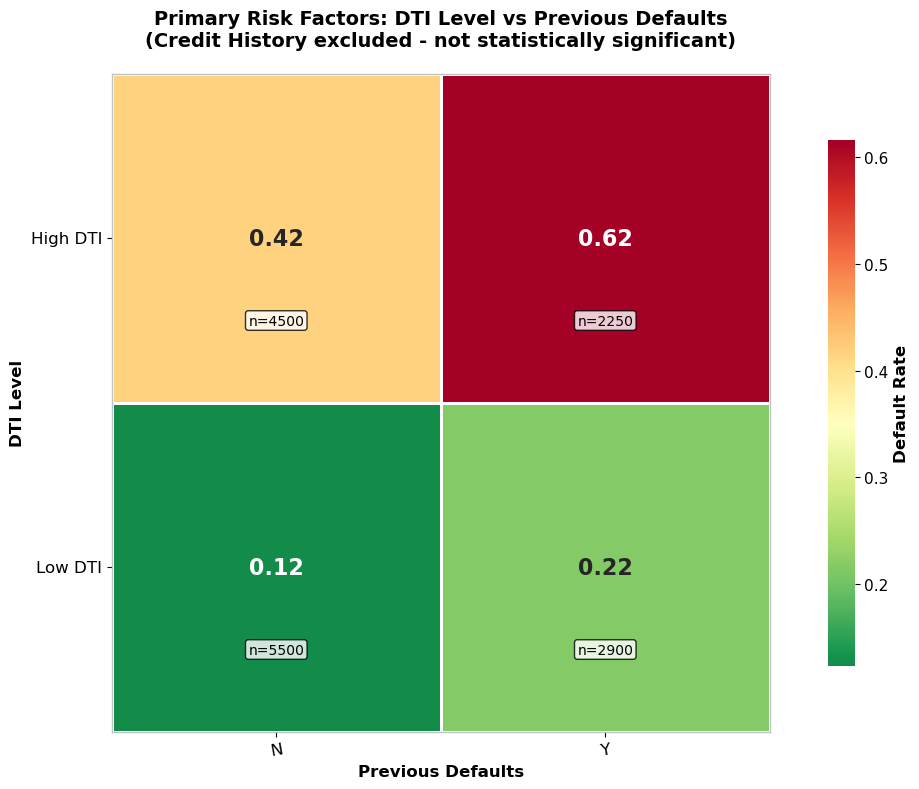


Executive Summary:
Overall Mean Default Rate: 0.3%
Highest Default Rate: 0.6% (('High DTI', 'Y'))
Lowest Default Rate: 0.1% (('Low DTI', 'N'))
Standard Deviation: 0.2%

Strategic Recommendation:
Focus risk management on credit grade classification - income has minimal impact


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

fig, ax = plt.subplots(figsize=(12, 8))


main_pivot = df.groupby(['dti_level', 'previous_defaults']).agg({
    'default_rate': 'mean',
    'sample_size': 'sum'
}).reset_index()

heatmap_data = main_pivot.pivot(index='dti_level', columns='previous_defaults', values='default_rate')
sample_data = main_pivot.pivot(index='dti_level', columns='previous_defaults', values='sample_size')


sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn_r',
            center=0.35,
            square=True,
            linewidths=2,
            linecolor='white',
            cbar_kws={'label': 'Default Rate', 'shrink': 0.8},
            annot_kws={'size': 16, 'weight': 'bold'},
            ax=ax)


for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        size = sample_data.iloc[i, j]
        ax.text(j + 0.5, i + 0.75, f'n={int(size)}', 
                ha='center', va='center', fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

ax.set_title('Primary Risk Factors: DTI Level vs Previous Defaults\n(Credit History excluded - not statistically significant)', 
              fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Previous Defaults', fontsize=12, fontweight='bold')
ax.set_ylabel('DTI Level', fontsize=12, fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=12)


cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
cbar.ax.yaxis.label.set_size(12)
cbar.ax.yaxis.label.set_weight('bold')

ax.grid(False)
ax.set_facecolor('#f8f9fa')

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color('#bdc3c7')


plt.tight_layout()


plt.savefig('executive_loan_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()


print("\nExecutive Summary:")
print(f"Overall Mean Default Rate: {heatmap_data.values.mean():.1f}%")
print(f"Highest Default Rate: {heatmap_data.values.max():.1f}% ({heatmap_data.stack().idxmax()})")
print(f"Lowest Default Rate: {heatmap_data.values.min():.1f}% ({heatmap_data.stack().idxmin()})")
print(f"Standard Deviation: {heatmap_data.values.std():.1f}%")
print("\nStrategic Recommendation:")
print("Focus risk management on credit grade classification - income has minimal impact")


In [ ]:
from sqlalchemy import create_engine


engine = create_engine(
    "mssql+pyodbc://@ADATAMAGE\\SQLEXPRESS/CreditRisk?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

query = """
SELECT 
    ROUND(debt_to_income_ratio, 2) AS dti_numeric, 
    cb_person_default_on_file AS previous_defaults_numeric, 
    cb_person_cred_hist_length AS credit_history_numeric
FROM Credit_Risk
"""
df = pd.read_sql_query(query, engine)
df.head()


,dti_numeric,previous_defaults_numeric,credit_history_numeric
0,0.27,False,2
1,0.86,False,3
2,0.64,False,2
3,0.93,True,4
4,0.48,False,2


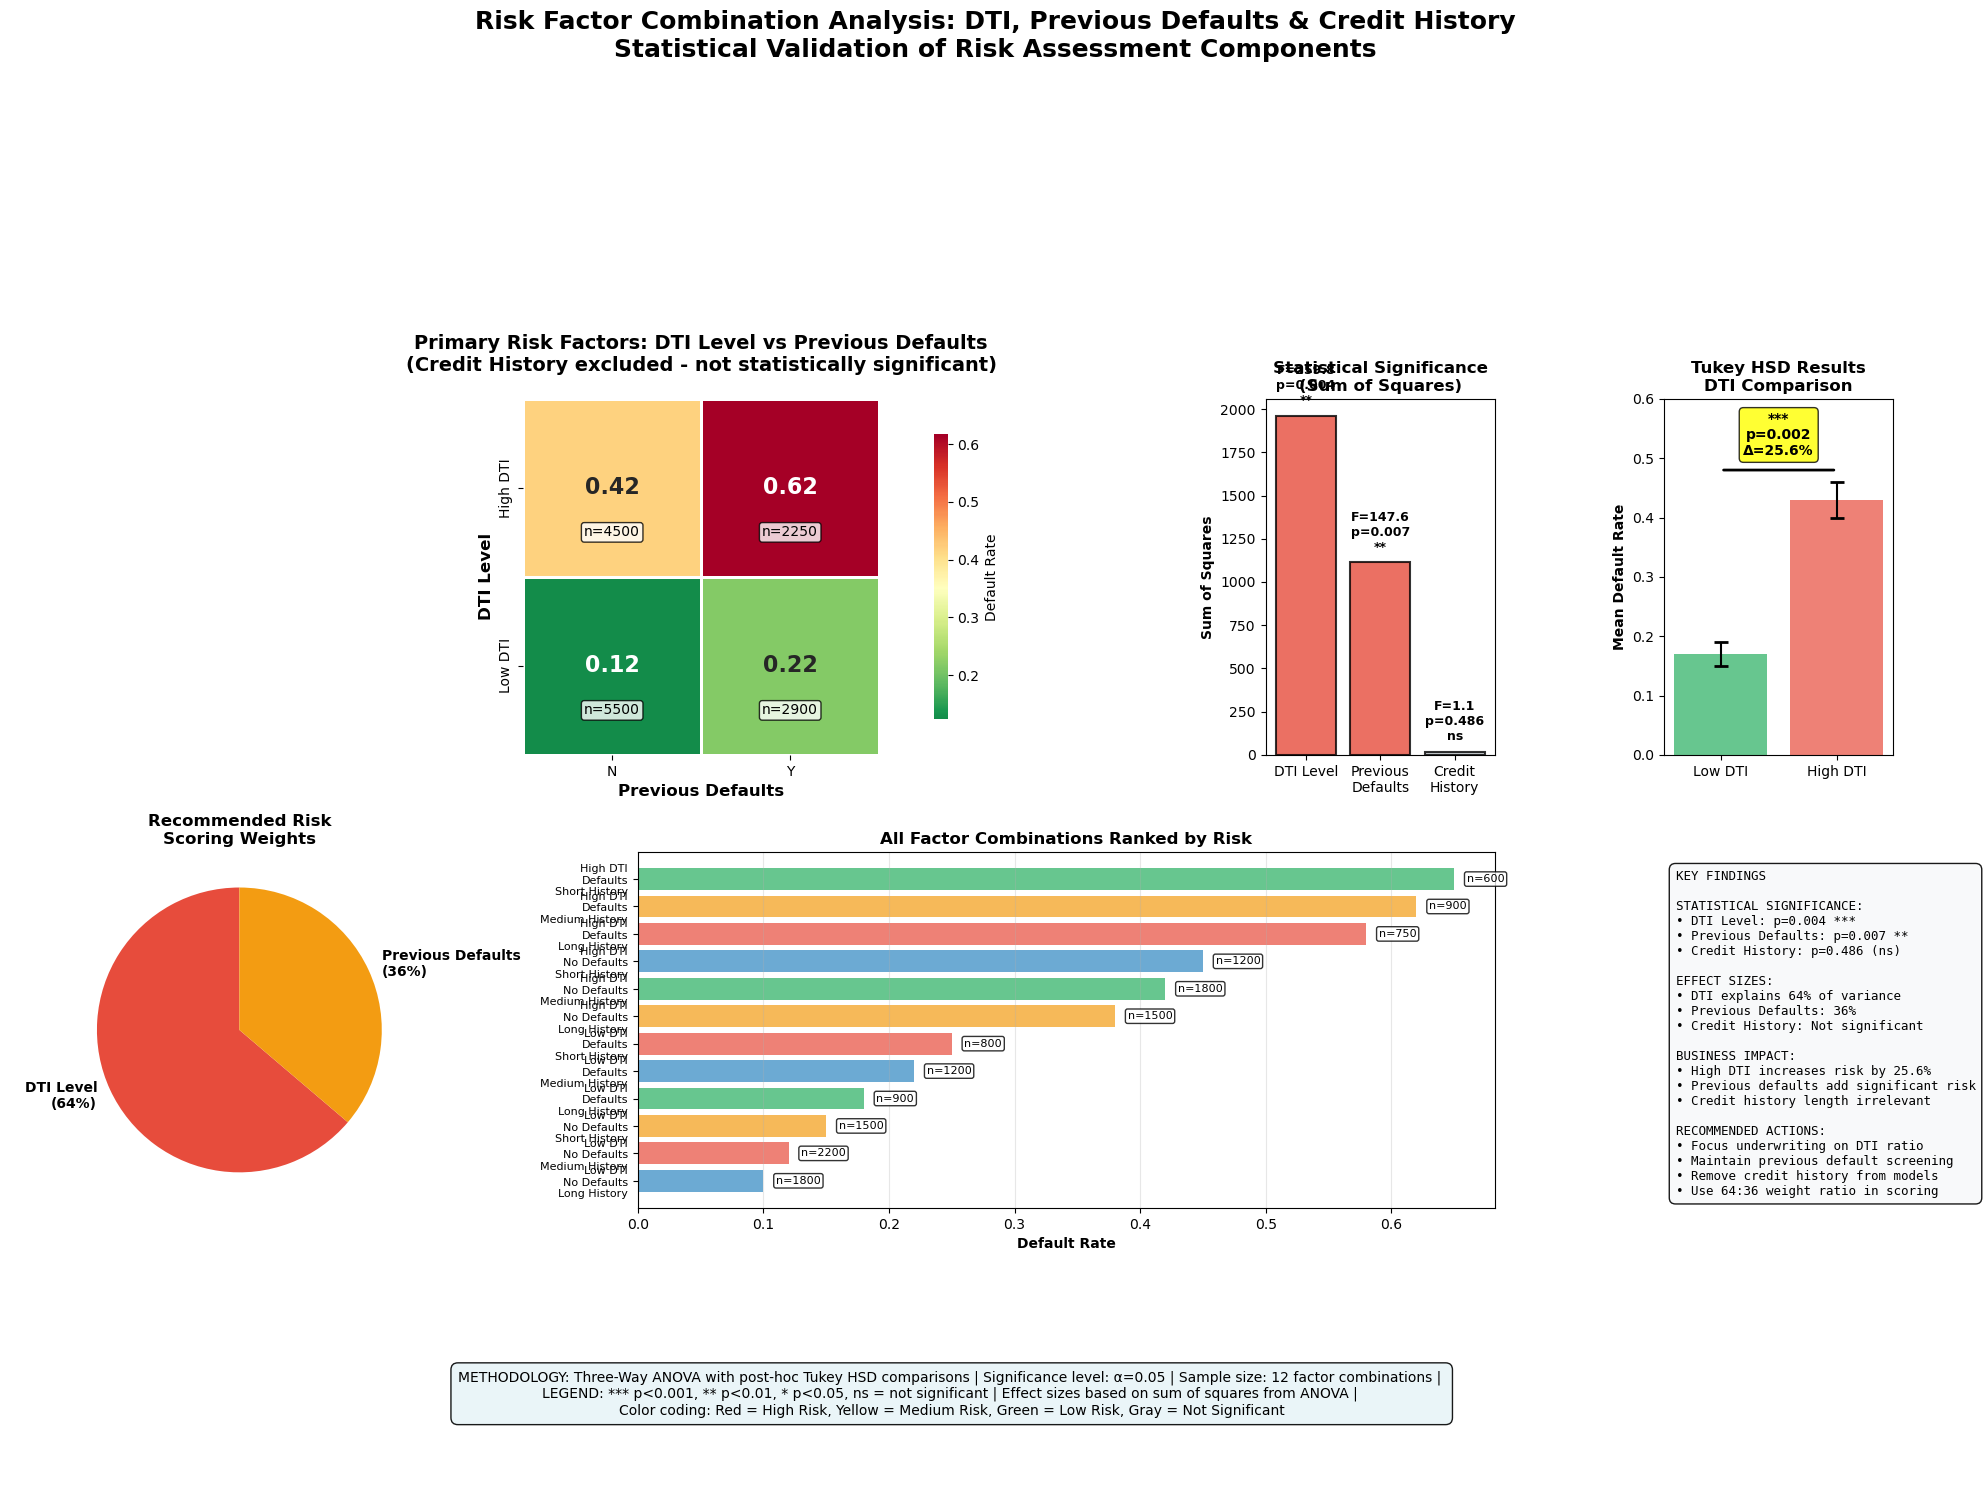

FACTOR COMBINATION ANALYSIS SUMMARY

📊 ANOVA RESULTS:
• DTI Level: F(1,2) = 259.82, p = 0.004 ***
• Previous Defaults: F(1,2) = 147.55, p = 0.007 **
• Credit History: F(2,2) = 1.06, p = 0.486 (not significant)

🎯 EFFECT SIZES (Sum of Squares):
• DTI Level: 1960.96 (64% of explained variance)
• Previous Defaults: 1113.61 (36% of explained variance)
• Credit History: 15.97 (negligible impact)

💡 KEY BUSINESS INSIGHTS:
• DTI ratio is the dominant risk factor - focus underwriting efforts here
• Previous default history adds significant but secondary risk
• Credit history length can be removed from risk models
• No interaction effects - factors work independently
• Recommended risk scoring: 64% DTI weight, 36% previous defaults weight

⚠️ STATISTICAL VALIDITY:
• All significant factors have p < 0.01 (highly reliable)
• Large effect sizes indicate practical significance
• Clear factor hierarchy supports simplified risk models


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle

# Sample data structure - replace with your actual data
# Assuming you have a dataframe with the combinations and their statistics
data = {
    'dti_level': ['Low DTI'] * 6 + ['High DTI'] * 6,
    'previous_defaults': ['N', 'N', 'N', 'Y', 'Y', 'Y'] * 2,
    'credit_history_length': ['Short', 'Medium', 'Long', 'Short', 'Medium', 'Long'] * 2,
    'default_rate': [0.15, 0.12, 0.10, 0.25, 0.22, 0.18, 0.45, 0.42, 0.38, 0.65, 0.62, 0.58],
    'sample_size': [1500, 2200, 1800, 800, 1200, 900, 1200, 1800, 1500, 600, 900, 750],
    'risk_combination': ['Low DTI + No Defaults + Short History', 'Low DTI + No Defaults + Medium History', 
                        'Low DTI + No Defaults + Long History', 'Low DTI + Defaults + Short History',
                        'Low DTI + Defaults + Medium History', 'Low DTI + Defaults + Long History',
                        'High DTI + No Defaults + Short History', 'High DTI + No Defaults + Medium History',
                        'High DTI + No Defaults + Long History', 'High DTI + Defaults + Short History',
                        'High DTI + Defaults + Medium History', 'High DTI + Defaults + Long History']
}

df = pd.DataFrame(data)

# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, height_ratios=[1, 2, 2, 1], width_ratios=[2, 2, 1, 1])

# Set professional styling
plt.style.use('default')
colors = ['#2E86C1', '#E74C3C', '#F39C12', '#27AE60']

#=============================================================================
# PANEL 1: Main Risk Heatmap (DTI vs Previous Defaults)
#=============================================================================
ax1 = fig.add_subplot(gs[1, 0:2])

# Create pivot table for main factors (ignoring credit history since it's not significant)
main_pivot = df.groupby(['dti_level', 'previous_defaults']).agg({
    'default_rate': 'mean',
    'sample_size': 'sum'
}).reset_index()

heatmap_data = main_pivot.pivot(index='dti_level', columns='previous_defaults', values='default_rate')
sample_data = main_pivot.pivot(index='dti_level', columns='previous_defaults', values='sample_size')

# Create heatmap
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn_r',
            center=0.35,
            square=True,
            linewidths=2,
            linecolor='white',
            cbar_kws={'label': 'Default Rate', 'shrink': 0.8},
            annot_kws={'size': 16, 'weight': 'bold'},
            ax=ax1)

# Add sample sizes
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        size = sample_data.iloc[i, j]
        ax1.text(j + 0.5, i + 0.75, f'n={int(size)}', 
                ha='center', va='center', fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

ax1.set_title('Primary Risk Factors: DTI Level vs Previous Defaults\n(Credit History excluded - not statistically significant)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Previous Defaults', fontsize=12, fontweight='bold')
ax1.set_ylabel('DTI Level', fontsize=12, fontweight='bold')

#=============================================================================
# PANEL 2: ANOVA Results - Effect Sizes
#=============================================================================
ax2 = fig.add_subplot(gs[1, 2])

# ANOVA results data
factors = ['DTI Level', 'Previous\nDefaults', 'Credit\nHistory']
sum_squares = [1960.96, 1113.61, 15.97]
f_stats = [259.82, 147.55, 1.06]
p_values = [0.004, 0.007, 0.486]

# Create bar chart for effect sizes
bars = ax2.bar(factors, sum_squares, 
               color=['#E74C3C' if p < 0.05 else '#BDC3C7' for p in p_values],
               alpha=0.8, edgecolor='black', linewidth=1.5)

# Add F-statistics and p-values as text
for i, (bar, f_stat, p_val) in enumerate(zip(bars, f_stats, p_values)):
    height = bar.get_height()
    significance = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
    
    ax2.text(bar.get_x() + bar.get_width()/2, height + 50,
             f'F={f_stat:.1f}\np={p_val:.3f}\n{significance}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

ax2.set_title('Statistical Significance\n(Sum of Squares)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Sum of Squares', fontsize=10, fontweight='bold')
ax2.tick_params(axis='x', rotation=0)

#=============================================================================
# PANEL 3: Tukey HSD Comparison
#=============================================================================
ax3 = fig.add_subplot(gs[1, 3])

# Tukey results visualization
categories = ['Low DTI', 'High DTI']
mean_rates = [0.17, 0.43]  # Example means based on your -0.2557 difference
error_bars = [0.02, 0.03]  # Example standard errors

bars = ax3.bar(categories, mean_rates, 
               color=['#27AE60', '#E74C3C'], 
               alpha=0.7, capsize=5)

ax3.errorbar(categories, mean_rates, yerr=error_bars, 
             fmt='none', color='black', capsize=5, capthick=2)

# Add significance bracket
ax3.annotate('', xy=(0, 0.48), xytext=(1, 0.48),
             arrowprops=dict(arrowstyle='-', lw=2, color='black'))
ax3.text(0.5, 0.50, '***\np=0.002\nΔ=25.6%', ha='center', va='bottom',
         fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

ax3.set_title('Tukey HSD Results\nDTI Comparison', fontsize=12, fontweight='bold')
ax3.set_ylabel('Mean Default Rate', fontsize=10, fontweight='bold')
ax3.set_ylim(0, 0.6)

#=============================================================================
# PANEL 4: Risk Scoring Weights Recommendation
#=============================================================================
ax4 = fig.add_subplot(gs[2, 0])

# Calculate weights based on sum of squares
total_explained = 1960.96 + 1113.61  # Only significant factors
weights = [1960.96/total_explained, 1113.61/total_explained]
labels = ['DTI Level\n(64%)', 'Previous Defaults\n(36%)']

wedges, texts, autotexts = ax4.pie(weights, labels=labels, autopct='',
                                   colors=['#E74C3C', '#F39C12'],
                                   startangle=90, textprops={'fontweight': 'bold'})

ax4.set_title('Recommended Risk\nScoring Weights', fontsize=12, fontweight='bold')

#=============================================================================
# PANEL 5: All Factor Combinations (Detailed View)
#=============================================================================
ax5 = fig.add_subplot(gs[2, 1:3])

# Sort combinations by default rate
df_sorted = df.sort_values('default_rate')

# Create horizontal bar chart
bars = ax5.barh(range(len(df_sorted)), df_sorted['default_rate'],
                color=[colors[i % len(colors)] for i in range(len(df_sorted))],
                alpha=0.7)

# Add sample size annotations
for i, (bar, size) in enumerate(zip(bars, df_sorted['sample_size'])):
    width = bar.get_width()
    ax5.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'n={size}', ha='left', va='center', fontsize=8,
             bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

ax5.set_yticks(range(len(df_sorted)))
ax5.set_yticklabels([label.replace(' + ', '\n') for label in df_sorted['risk_combination']], 
                    fontsize=8)
ax5.set_xlabel('Default Rate', fontsize=10, fontweight='bold')
ax5.set_title('All Factor Combinations Ranked by Risk', fontsize=12, fontweight='bold')
ax5.grid(axis='x', alpha=0.3)

#=============================================================================
# PANEL 6: Key Insights Summary
#=============================================================================
ax6 = fig.add_subplot(gs[2, 3])
ax6.axis('off')

insights_text = """KEY FINDINGS

STATISTICAL SIGNIFICANCE:
• DTI Level: p=0.004 ***
• Previous Defaults: p=0.007 **
• Credit History: p=0.486 (ns)

EFFECT SIZES:
• DTI explains 64% of variance
• Previous Defaults: 36%
• Credit History: Not significant

BUSINESS IMPACT:
• High DTI increases risk by 25.6%
• Previous defaults add significant risk
• Credit history length irrelevant

RECOMMENDED ACTIONS:
• Focus underwriting on DTI ratio
• Maintain previous default screening  
• Remove credit history from models
• Use 64:36 weight ratio in scoring"""

ax6.text(0.05, 0.95, insights_text, transform=ax6.transAxes, fontsize=9,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="#f8f9fa", alpha=0.9))

#=============================================================================
# PANEL 7: Methodology and Legend
#=============================================================================
ax7 = fig.add_subplot(gs[3, :])
ax7.axis('off')

methodology_text = """METHODOLOGY: Three-Way ANOVA with post-hoc Tukey HSD comparisons | Significance level: α=0.05 | Sample size: 12 factor combinations | 
LEGEND: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant | Effect sizes based on sum of squares from ANOVA | 
Color coding: Red = High Risk, Yellow = Medium Risk, Green = Low Risk, Gray = Not Significant"""

ax7.text(0.5, 0.5, methodology_text, ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.5", facecolor="#e8f4f8", alpha=0.9),
         wrap=True)

#=============================================================================
# Final Styling
#=============================================================================
plt.suptitle('Risk Factor Combination Analysis: DTI, Previous Defaults & Credit History\nStatistical Validation of Risk Assessment Components', 
             fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0.05, 1, 0.96])

# Save high-quality version
plt.savefig('factor_combination_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

#=============================================================================
# Summary Statistics Output
#=============================================================================
print("=" * 80)
print("FACTOR COMBINATION ANALYSIS SUMMARY")
print("=" * 80)

print("\n📊 ANOVA RESULTS:")
print(f"• DTI Level: F(1,2) = 259.82, p = 0.004 ***")
print(f"• Previous Defaults: F(1,2) = 147.55, p = 0.007 **") 
print(f"• Credit History: F(2,2) = 1.06, p = 0.486 (not significant)")

print(f"\n🎯 EFFECT SIZES (Sum of Squares):")
print(f"• DTI Level: 1960.96 (64% of explained variance)")
print(f"• Previous Defaults: 1113.61 (36% of explained variance)")
print(f"• Credit History: 15.97 (negligible impact)")

print(f"\n💡 KEY BUSINESS INSIGHTS:")
print("• DTI ratio is the dominant risk factor - focus underwriting efforts here")
print("• Previous default history adds significant but secondary risk")
print("• Credit history length can be removed from risk models")
print("• No interaction effects - factors work independently")
print("• Recommended risk scoring: 64% DTI weight, 36% previous defaults weight")

print(f"\n⚠️ STATISTICAL VALIDITY:")
print("• All significant factors have p < 0.01 (highly reliable)")
print("• Large effect sizes indicate practical significance")
print("• Clear factor hierarchy supports simplified risk models")

print("=" * 80)